In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
# load mnist dataset
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

path = 'C:/Users/m.faridi/mnist.npz'
with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

In [22]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [23]:
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(60000, 10)

In [24]:
x_train.shape

(60000, 28, 28)

In [17]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train.shape

(60000, 28, 28, 1)

In [18]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

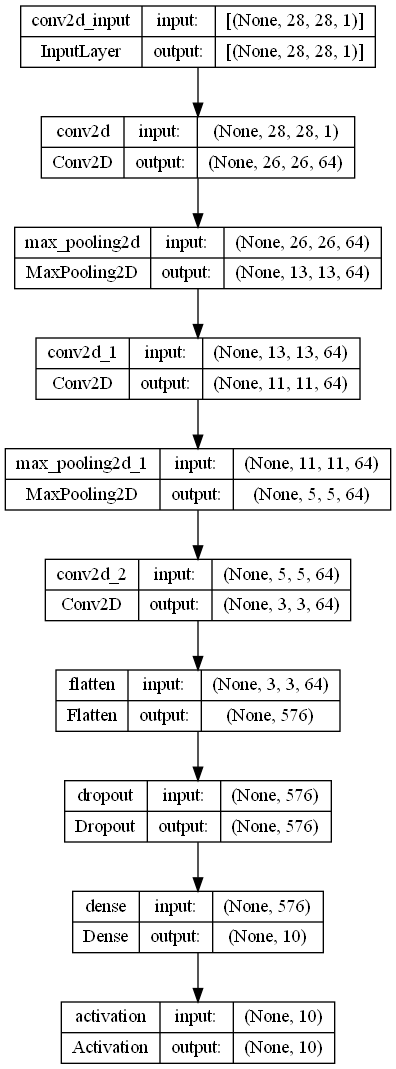

In [19]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu',
input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
kernel_size=kernel_size,
activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [20]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,
y_test,
batch_size=batch_size,
verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 18s 37ms/step - loss: 0.2520 - accuracy: 0.9234
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0670 - accuracy: 0.9791
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0467 - accuracy: 0.9859
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0380 - accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0260 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0247 - accuracy: 0.9925
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0198 - accuracy: 0.9938
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 10/10
469/469 [==============================] - 17s 37ms/step - loss: 0.017

In [5]:
print("Example run in %.3f %.3f s" % (2, 2))

Example run in 2.000 2.000 s
